In [50]:
import sys
sys.path.append("../lib/myenv")
from gridworld import gridworld
import pygame
import numpy as np 
import random
import matplotlib.pyplot as plt 
from IPython.display import Image


# sample from categorical distribution
def sample_categorical(probabilities):
    return random.choices(range(len(probabilities)), probabilities)[0]

# gridworld dimension
dim=4

# gamma discounting factor 
gamma=1

#env variable 
gw=gridworld(dim)


# The agent is placed at (0,0) and value function are initiliazed to a zero array
gw.reset()


# State value (V) is an array of dimension nxn where n is the gridworld size
V=np.random.rand(dim,dim)

#alpha for incremental mean
alpha=0.1


In [25]:
################ policy  ########################################

def policy(dim):
    """
    Initial policy with 1/4 chance for each action
    Input: dimension of gridworld
    output: random uniform policy
    """
    pi={}
    for i in range(dim):
        for j in range(dim):
            pi[(i,j)]=[0.25]*4

    return pi


In [26]:
# Initial policy

# The action mapping for human readibility
# 0:right
# 1:Left
# 2:UP
# 3:Down 

pi=policy(dim)
sliced_policy = dict(list(pi.items())[:5])
sliced_policy


{(0, 0): [0.25, 0.25, 0.25, 0.25],
 (0, 1): [0.25, 0.25, 0.25, 0.25],
 (0, 2): [0.25, 0.25, 0.25, 0.25],
 (0, 3): [0.25, 0.25, 0.25, 0.25],
 (1, 0): [0.25, 0.25, 0.25, 0.25]}

In [27]:
def episode(pi,dim,log=True):
    # reset environement
    gw.reset()
    # Init observation
    o=(0,0,dim-1,dim-1)
    # track state termination
    terminated=False
    # list of rewards
    rewards=[]
    # State/action/reward list
    sar=[]
    #Initial reward
    r=-1
    # episode length
    l=0
    while True :
        l+=1
        # sample an action 
        a=sample_categorical(pi[o[:2]])
        # store the action/state/reward in a list
        sar.append((o[:2],a,r))
        if terminated:
            break
        o,r,terminated,_,_,=gw.step(a)
        rewards.append(r)

    if log:
        print("total rewards: ", np.sum(rewards))
        # print("state action reward: ",sar)
        print("length of episode: ",l)
    return sar

In [30]:
episode(pi,dim=4)

total rewards:  -13
length of episode:  15


[((0, 0), 2, -1),
 ((0, 0), 1, -1),
 ((0, 0), 0, -1),
 ((1, 0), 1, -1),
 ((0, 0), 2, -1),
 ((0, 0), 2, -1),
 ((0, 0), 1, -1),
 ((0, 0), 0, -1),
 ((1, 0), 2, -1),
 ((1, 0), 0, -1),
 ((2, 0), 0, -1),
 ((3, 0), 3, -1),
 ((3, 1), 3, -1),
 ((3, 2), 3, -1),
 ((3, 3), 2, 0)]

### Prediction with TD(0)

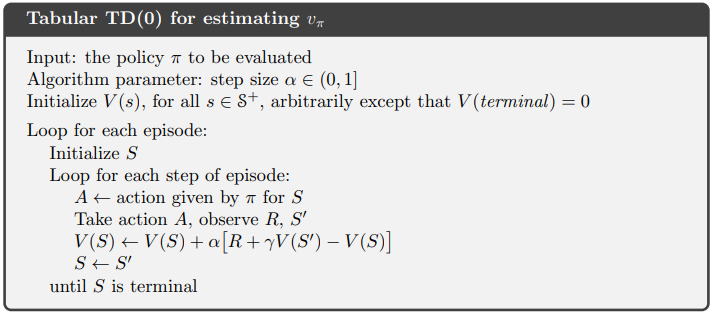

In [34]:
Image(filename="TD0.png")


In [49]:
# state value matrix
V

array([[0.6608542 , 0.16513413, 0.65320281, 0.47592405],
       [0.2734423 , 0.7740589 , 0.19586091, 0.81316698],
       [0.07827605, 0.38422696, 0.43190289, 0.72254359],
       [0.41097728, 0.16996138, 0.34801834, 0.75665803]])

In [64]:
num_episodes=100

In [67]:
for _ in range(num_episodes):
    sar=episode(pi,dim,log=False)
    for e,f in zip(sar,sar[1:]):
        s,a,r=e
        s1,a1,r1=f
        td_target=r+(gamma*V[s1])
        V[s]=V[s]+alpha*(td_target-V[s])


In [68]:
V

array([[-51.70860947, -49.27703537, -46.39652505, -42.20914016],
       [-49.85515536, -45.85144201, -41.30186465, -37.64659329],
       [-45.9002361 , -40.57070437, -33.29371349, -24.12481232],
       [-41.06672824, -34.45169413, -26.82103093,   0.63323988]])